In [1]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Fake_Real_Data.csv')

In [4]:
df

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real
...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake
9896,Trump consults Republican senators on Fed chie...,Real
9897,Trump lawyers say judge lacks jurisdiction for...,Real
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake


In [5]:
wv['good']

array([ 0.04052734,  0.0625    , -0.01745605,  0.07861328,  0.03271484,
       -0.01263428,  0.00964355,  0.12353516, -0.02148438,  0.15234375,
       -0.05834961, -0.10644531,  0.02124023,  0.13574219, -0.13183594,
        0.17675781,  0.27148438,  0.13769531, -0.17382812, -0.14160156,
       -0.03076172,  0.19628906, -0.03295898,  0.125     ,  0.25390625,
        0.12695312, -0.15234375,  0.03198242,  0.01135254, -0.01361084,
       -0.12890625,  0.01019287,  0.23925781, -0.08447266,  0.140625  ,
        0.13085938, -0.04516602,  0.06494141,  0.02539062,  0.05615234,
        0.24609375, -0.20507812,  0.23632812, -0.00860596, -0.02294922,
        0.05078125,  0.10644531, -0.03564453,  0.08740234, -0.05712891,
        0.08496094,  0.23535156, -0.10107422, -0.03564453, -0.04736328,
        0.04736328, -0.14550781, -0.10986328,  0.14746094, -0.23242188,
       -0.07275391,  0.19628906, -0.37890625, -0.07226562,  0.04833984,
        0.11914062,  0.06103516, -0.12109375, -0.27929688,  0.05

In [7]:
import spacy
nlp = spacy.load('en_core_web_lg')
def preprocess_vectorize(words):
    doc = nlp(words)
    
    filtered_token = []
    
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_token.append(token.lemma_)
    
    return wv.get_mean_vector(filtered_token) # for getting vector of whole sentence we have to average vector of all words

In [8]:
preprocess_vectorize('what is the matter with you')

array([ 4.77620699e-02,  7.34801078e-03,  3.37144025e-02,  8.96889530e-03,
       -4.40880656e-02,  7.90991783e-02,  1.91048279e-01, -6.78610429e-02,
        8.42860043e-02, -2.46374477e-02, -5.74873798e-02, -2.02070307e-02,
        5.61906733e-02,  7.94233568e-03, -1.18432648e-01,  1.18432648e-01,
        1.08491220e-01,  7.26156384e-02,  4.07922687e-03, -4.53847721e-02,
       -5.23005500e-02, -2.78792176e-02,  6.65643364e-02, -4.86265421e-02,
        2.00989712e-02,  3.95495892e-02, -1.88022628e-02, -5.96485585e-02,
        2.46374477e-02, -1.84780862e-02, -2.51777433e-02,  1.78297330e-02,
        3.41466404e-02,  4.34397124e-02, -3.52272280e-02,  1.38315503e-02,
        7.30478764e-02, -2.28004456e-02,  1.30535260e-01,  1.45879630e-02,
        4.40880656e-02,  4.88966890e-03,  1.44799035e-02,  5.61906733e-02,
       -5.96485585e-02, -2.39890944e-02,  5.74873798e-02, -3.22015770e-02,
       -7.90991783e-02,  6.39709160e-02,  3.17693427e-02,  4.12785336e-02,
        2.37729773e-02, -

In [9]:
df

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real
...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake
9896,Trump consults Republican senators on Fed chie...,Real
9897,Trump lawyers say judge lacks jurisdiction for...,Real
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake


In [10]:
df['vectors'] = df.Text.apply(preprocess_vectorize)

In [11]:
df

,Text,label,vectors
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,"[0.008145372, 0.019952843, -0.00989356, 0.0344..."
1,U.S. conservative leader optimistic of common ...,Real,"[0.00861828, 0.007408227, 0.0007675802, 0.0138..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,"[0.01823076, 0.0063306373, -0.0058634086, 0.03..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,"[0.012453172, 0.0122098895, 6.3027373e-06, 0.0..."
4,Democrats say Trump agrees to work on immigrat...,Real,"[-0.0022669104, 0.011340516, 0.003596399, 0.02..."
...,...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake,"[0.008831558, 0.015438636, -0.004147679, 0.031..."
9896,Trump consults Republican senators on Fed chie...,Real,"[0.010248032, 0.0032859934, -0.0033077213, 0.0..."
9897,Trump lawyers say judge lacks jurisdiction for...,Real,"[0.0031644572, 0.0046021678, 0.0106176855, -0...."
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake,"[0.006163191, 0.015076712, 0.00019834226, 0.01..."


In [12]:
df['label_num'] = df.label.map({'Fake' : 0, 'Real' : 1})

In [13]:
df

,Text,label,vectors,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,"[0.008145372, 0.019952843, -0.00989356, 0.0344...",0
1,U.S. conservative leader optimistic of common ...,Real,"[0.00861828, 0.007408227, 0.0007675802, 0.0138...",1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,"[0.01823076, 0.0063306373, -0.0058634086, 0.03...",1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,"[0.012453172, 0.0122098895, 6.3027373e-06, 0.0...",0
4,Democrats say Trump agrees to work on immigrat...,Real,"[-0.0022669104, 0.011340516, 0.003596399, 0.02...",1
...,...,...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake,"[0.008831558, 0.015438636, -0.004147679, 0.031...",0
9896,Trump consults Republican senators on Fed chie...,Real,"[0.010248032, 0.0032859934, -0.0033077213, 0.0...",1
9897,Trump lawyers say judge lacks jurisdiction for...,Real,"[0.0031644572, 0.0046021678, 0.0106176855, -0....",1
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake,"[0.006163191, 0.015076712, 0.00019834226, 0.01...",0


In [14]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(df.vectors, df.label_num, test_size=0.2, stratify=df.label_num, random_state=2022)

In [15]:
import numpy as np

X_train_stack = np.stack(X_train)
X_test_stack = np.stack(X_test)

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_train_emmbed = scaler.fit_transform(X_train_stack)
scaled_test_emmbed = scaler.transform(X_test_stack)

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

model = GradientBoostingClassifier()

model.fit(scaled_train_emmbed, y_train)

y_pred = model.predict(scaled_test_emmbed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1000
           1       0.97      0.98      0.98       980

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

Text(95.72222222222221, 0.5, 'truth')

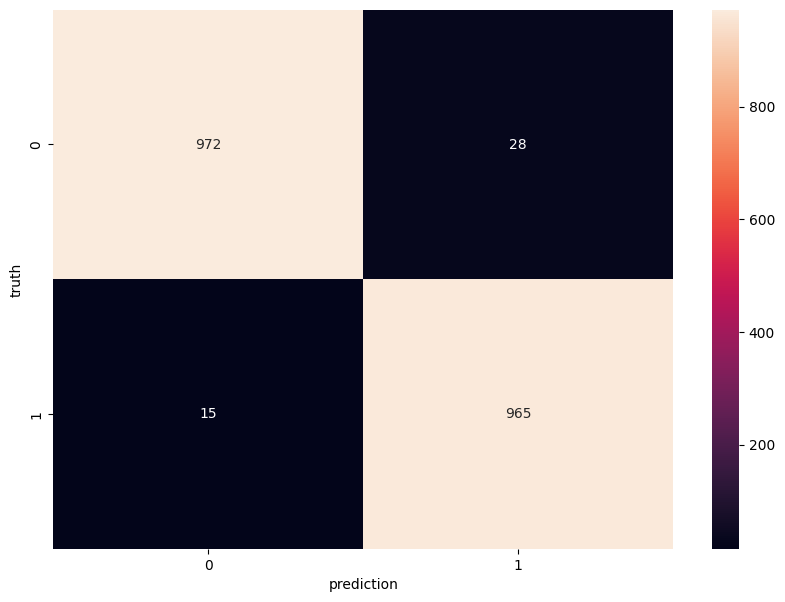

In [23]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')

plt.xlabel('prediction')
plt.ylabel('truth')